<a href="https://colab.research.google.com/github/bekingcn/colab-archive/blob/main/SamWitteveen/YT_Claude_Haiku_Crash_Course_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# langchain stuff
!pip -q install langchain langchain-core langsmith langchain_experimental
!pip -q install langgraph langchain-community langchainhub grandalf

# anthropic llms model support
!pip -q install anthropic langchain-anthropic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.6/851.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from IPython.display import display, Markdown


In [ ]:
import os
from google.colab import userdata


os.environ["ANTHROPIC_API_KEY"] = userdata.get('ANTHROPIC_API_KEY')

In [ ]:
!git clone https://github.com/anthropics/anthropic-cookbook.git

Cloning into 'anthropic-cookbook'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 266 (delta 52), reused 98 (delta 47), pack-reused 154
Receiving objects: 100% (266/266), 141.38 MiB | 31.53 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Updating files: 100% (85/85), done.


In [ ]:

# MODEL_NAME = "claude-3-opus-20240229"
# MODEL_NAME = "claude-3-sonnet-20240229"
MODEL_NAME = "claude-3-haiku-20240307"

## Basics with Text

In [ ]:
from anthropic import Anthropic
import json
import re
from pprint import pprint

In [ ]:
client = Anthropic()

In [ ]:
message = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "Write me the lyrics to a made up Taylor Swift song called 'Filled out space' "
        },
    ]
).content[0].text

print(f"Using model:{MODEL_NAME}\n")
print(message)

Using model:claude-3-haiku-20240307

Here is my attempt at original lyrics for a made-up Taylor Swift song called "Filled Out Space":

Verse 1:
The empty space on my walls, 
Staring back at me, bare and alone.
Longing for pictures, memories to hold,
A story to tell, a life overthrown.

Chorus:
I need to fill out this space,
With moments captured, a tangible trace.
Snapshots of laughter, of love and of grace,
To make this house feel like a lived-in place.

Verse 2: 
Bare shelves, lacking treasured trinkets,
No keepsakes to dust, no photos to frame.
This empty abode, it aches to be lived in,
Yearning for evidence, a family's claim.

Chorus:
I need to fill out this space, 
With moments captured, a tangible trace.
Snapshots of laughter, of love and of grace,
To make this house feel like a lived-in place.

Bridge:
These blank walls, they echo my soul,
Craving to be adorned, to feel whole.
I'll gather the pieces of my life's mosaic,
And lay them out, this space to beautify.

Chorus: 
I'll fi

### JSON

In [ ]:
message = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "Give me a JSON dict with names of famous athletes & their sports."
        },
    ]
).content[0].text

print(f"Using model:{MODEL_NAME}\n")
print(message)

Using model:claude-3-haiku-20240307

Here's a JSON dictionary with the names of famous athletes and their respective sports:

{
  "Michael Jordan": "Basketball",
  "Serena Williams": "Tennis",
  "Lionel Messi": "Soccer",
  "Muhammad Ali": "Boxing",
  "Usain Bolt": "Track and Field",
  "Simone Biles": "Gymnastics",
  "Tom Brady": "American Football",
  "Cristiano Ronaldo": "Soccer",
  "Lebron James": "Basketball",
  "Roger Federer": "Tennis"
}


In [ ]:
def extract_json(response):
    json_start = response.index("{")
    json_end = response.rfind("}")
    return json.loads(response[json_start:json_end + 1])

sports_dict = extract_json(message)
sports_dict

{'Michael Jordan': 'Basketball',
 'Serena Williams': 'Tennis',
 'Lionel Messi': 'Soccer',
 'Muhammad Ali': 'Boxing',
 'Usain Bolt': 'Track and Field',
 'Simone Biles': 'Gymnastics',
 'Tom Brady': 'American Football',
 'Cristiano Ronaldo': 'Soccer',
 'Lebron James': 'Basketball',
 'Roger Federer': 'Tennis'}

In [ ]:
message = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "Give me a JSON dict with names of famous athletes & their sports."
        },
        {
            "role": "assistant",
            "content": "Here is the JSON requested:\n{"
        }
    ]
).content[0].text

print(f"Using model:{MODEL_NAME}\n")
print(message)

Using model:claude-3-haiku-20240307


  "Lionel Messi": "Soccer/Football",
  "Serena Williams": "Tennis",
  "LeBron James": "Basketball",
  "Michael Phelps": "Swimming",
  "Usain Bolt": "Track and Field",
  "Cristiano Ronaldo": "Soccer/Football",
  "Simone Biles": "Gymnastics",
  "Tom Brady": "American Football",
  "Roger Federer": "Tennis",
  "Neymar": "Soccer/Football"
}


In [ ]:
output_json = json.loads("{" + message[:message.rfind("}") + 1])
output_json

{'Lionel Messi': 'Soccer/Football',
 'Serena Williams': 'Tennis',
 'LeBron James': 'Basketball',
 'Michael Phelps': 'Swimming',
 'Usain Bolt': 'Track and Field',
 'Cristiano Ronaldo': 'Soccer/Football',
 'Simone Biles': 'Gymnastics',
 'Tom Brady': 'American Football',
 'Roger Federer': 'Tennis',
 'Neymar': 'Soccer/Football'}

## Exemplars

In [ ]:
# MODEL_NAME = "claude-3-opus-20240229"
# MODEL_NAME = "claude-3-sonnet-20240229"
MODEL_NAME = "claude-3-haiku-20240307"

In [ ]:
message = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "I want to create a few shot learning prompt that has 8 examplars. The prompt will be asking the model to reason over grade school math questions. Please generate 8 examples I can use and wrap them indivually in XML format. Include thinking step by step for each one."
        },
    ]
).content[0].text

print(f"Using model:{MODEL_NAME}\n")
print(message)

Using model:claude-3-haiku-20240307

Sure, here are 8 examples of grade school math questions with step-by-step thinking, wrapped in XML format:

<example1>
Question: If a classroom has 24 students, and 8 of them are boys, how many girls are in the classroom?
Thinking:
1. The total number of students in the classroom is 24.
2. The number of boys in the classroom is 8.
3. To find the number of girls, we need to subtract the number of boys from the total number of students.
4. 24 - 8 = 16
Therefore, there are 16 girls in the classroom.
</example1>

<example2>
Question: A baker baked 36 cookies and sold 24 of them. How many cookies does the baker have left?
Thinking:
1. The baker baked 36 cookies.
2. The baker sold 24 cookies.
3. To find the number of cookies the baker has left, we need to subtract the number of cookies sold from the total number of cookies baked.
4. 36 - 24 = 12
Therefore, the baker has 12 cookies left.
</example2>

<example3>
Question: A farmer has 15 chickens and 7 pig

In [ ]:
MODEL_NAME = "claude-3-opus-20240229"

message = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=[
        {
            "role": "user",
            "content": "I want to create a few shot learning prompt that has 8 examplars. The prompt will be asking the model to reason over grade school math questions. Please generate 8 examples I can use and wrap them indivually in XML format. Include thinking step by step for each one."
        },
    ]
).content[0].text

print(f"Using model:{MODEL_NAME}\n")
print(message)

Using model:claude-3-opus-20240229

Here are 8 examples of grade school math questions with step-by-step reasoning, wrapped in XML format:

<example>
Question: If John has 5 apples and Sarah gives him 3 more, how many apples does John have now?
Reasoning:
Step 1: Identify the number of apples John starts with (5).
Step 2: Identify the number of apples Sarah gives to John (3).
Step 3: Add the number of apples John starts with and the number of apples Sarah gives him (5 + 3 = 8).
Answer: John now has 8 apples.
</example>

<example>
Question: A bakery sold 24 cookies on Monday and 36 cookies on Tuesday. How many cookies did the bakery sell in total?
Reasoning:
Step 1: Identify the number of cookies sold on Monday (24).
Step 2: Identify the number of cookies sold on Tuesday (36).
Step 3: Add the number of cookies sold on Monday and Tuesday (24 + 36 = 60).
Answer: The bakery sold a total of 60 cookies.
</example>

<example>
Question: A rectangle has a length of 12 inches and a width of 5 in

## Images

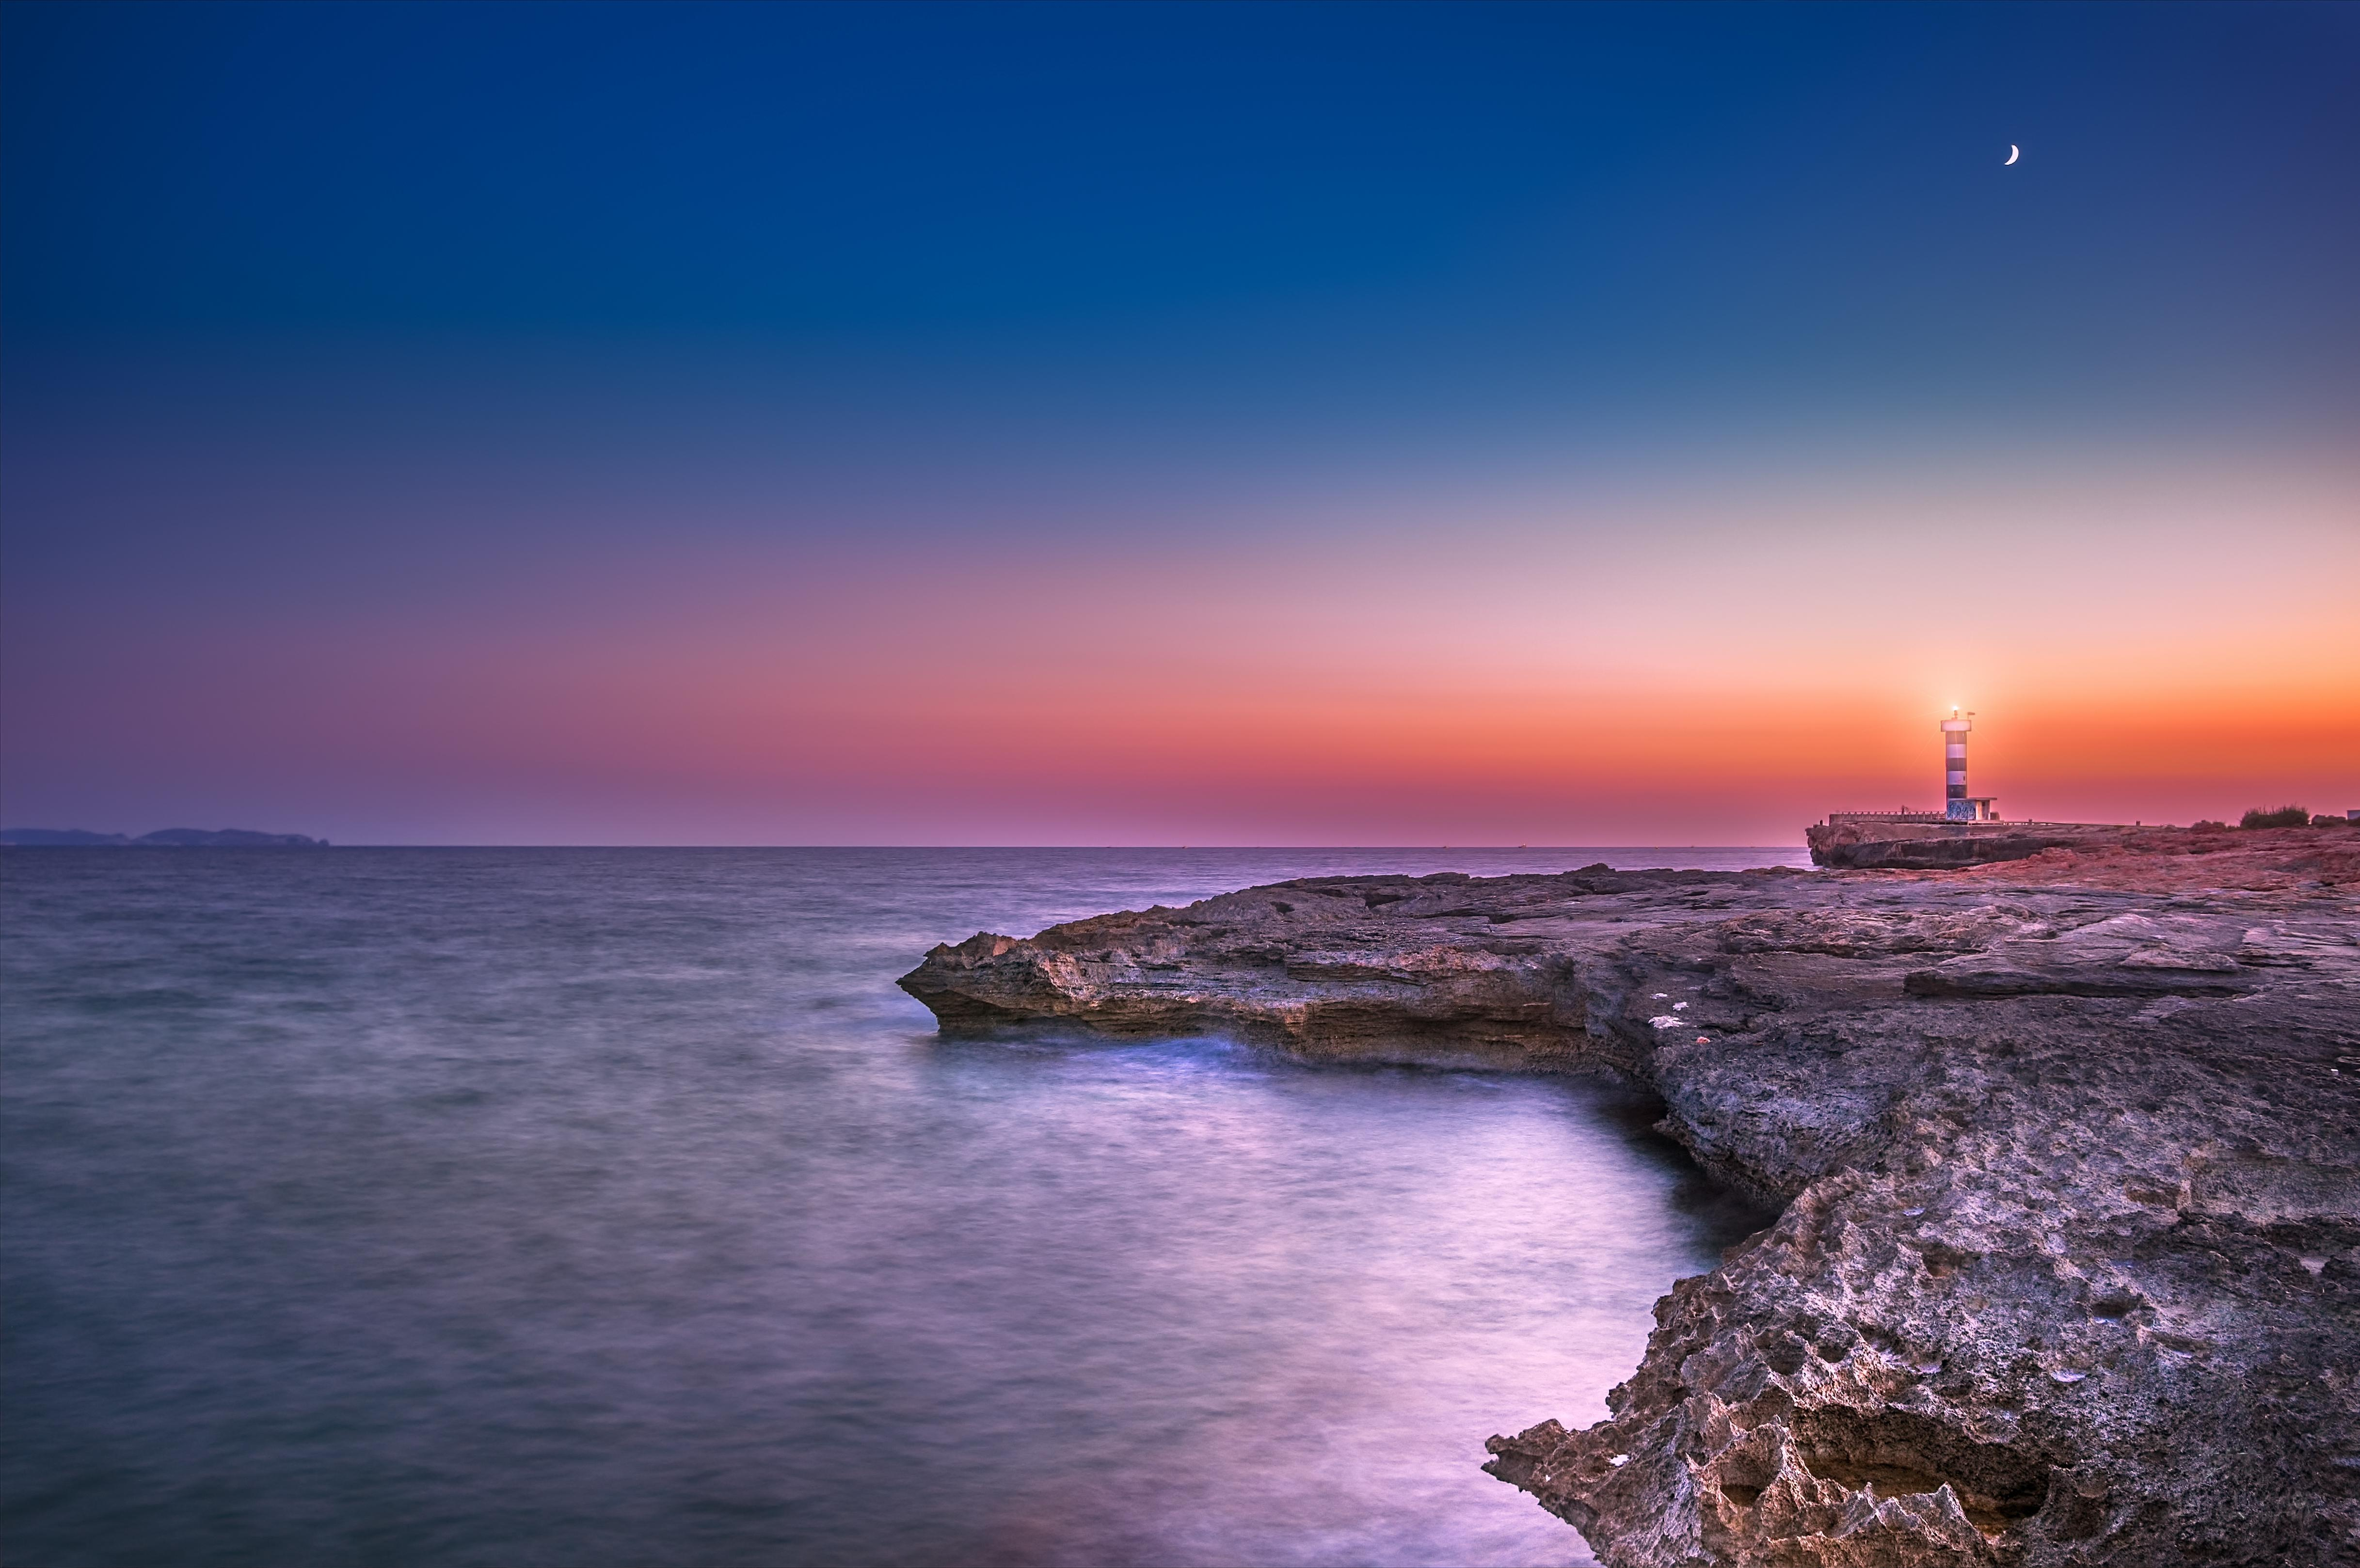

In [ ]:
from IPython.display import Image
Image(filename='/content/anthropic-cookbook/images/sunset.jpeg',width=400)

In [ ]:
import base64
from anthropic import Anthropic

client = Anthropic()


with open("/content/anthropic-cookbook/images/sunset.jpeg", "rb") as image_file:
    binary_data = image_file.read()
    base_64_encoded_data = base64.b64encode(binary_data)
    base64_string = base_64_encoded_data.decode('utf-8')


message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": base64_string}},
            {"type": "text", "text": "Write a sonnet based on this image."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(f"Using model:{MODEL_NAME}\n")
print(response.content[0].text)

Using model:claude-3-haiku-20240307

The Lighthouse's Vigil

Beneath the sky's ethereal embrace,
The lighthouse stands, a beacon in the night,
Guiding the weary souls with radiant grace,
Illuminating the path to safety's light.

The rocky shore, a testament to time,
Whispers tales of the sea's eternal sway,
As the waves crash and ebb in rhythmic chime,
Singing a timeless melody of the day.

The setting sun paints the horizon aglow,
Casting a blanket of hues, a work of art,
Inviting us to pause, to watch and know,
The beauty that nature can to us impart.

In this tranquil moment, the world stands still,
Reflecting the lighthouse's eternal will.


### With URL

In [ ]:
IMAGE_URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Machu_Picchu%2C_Peru_%282018%29.jpg/2560px-Machu_Picchu%2C_Peru_%282018%29.jpg"
Image(url=IMAGE_URL, width=400)

In [ ]:
import httpx

IMAGE_DATA = base64.b64encode(httpx.get(IMAGE_URL).content).decode("utf-8")

message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": IMAGE_DATA}},
            {"type": "text", "text": "Describe this image in two sentences."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(f"Using model:{MODEL_NAME}\n")
print(response.content[0].text)

Using model:claude-3-haiku-20240307

This image depicts the ancient Inca ruins of Machu Picchu, a UNESCO World Heritage site located high in the Andes mountains of Peru. The ruins are set against a stunning backdrop of lush, rugged mountains, showcasing the impressive architectural and engineering achievements of the Inca civilization.


### Transcribing handwriting

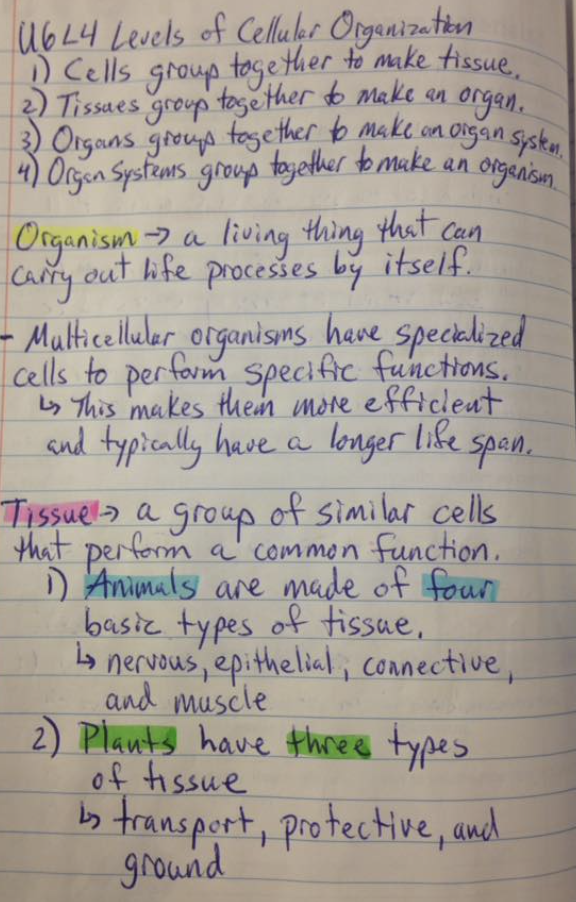

In [ ]:
Image(filename='/content/anthropic-cookbook/images/transcribe/school_notes.png',width=400)

In [ ]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("/content/anthropic-cookbook/images/transcribe/school_notes.png")}},
            {"type": "text", "text": "Transcribe this text. Only output the text and nothing else."}
        ]
    }
]


response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)

print(f"Using model:{MODEL_NAME}\n")
print(response.content[0].text)

Using model:claude-3-haiku-20240307

W6.4 Levels of Cellular Organization
1) Cells group together to make tissue. 
2) Tissues group together to make an organ.
3) Organs group together to make an organ system.
4) Organ Systems group together to make an organism.

Organism -> a living thing that can carry out life processes by itself.

Multicellular organisms have specialized cells to perform specific functions. This makes them more efficient and typically have a longer life span.

Tissue: a group of similar cells that perform a common function.
1) Animals are made of four basic types of tissue: nervous, epithelial, connective, and muscle.
2) Plants have three types of tissue: transport, protective, and ground.


### Counting

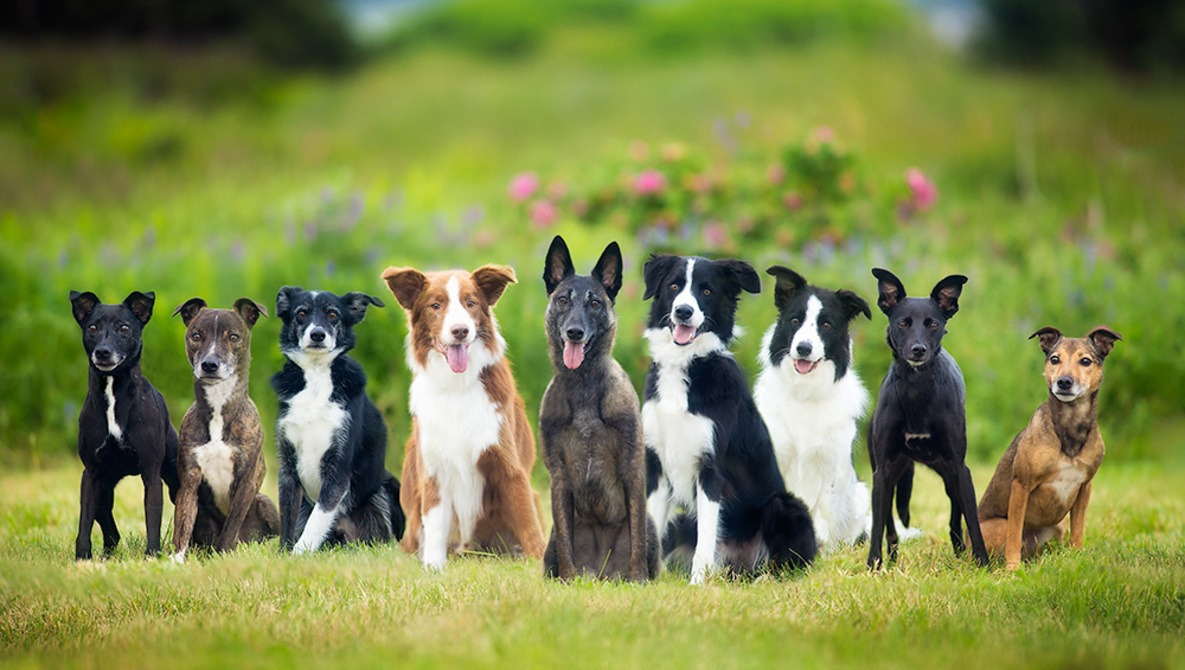

In [ ]:
Image(filename='/content/anthropic-cookbook/images/best_practices/nine_dogs.jpg', width=400)

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image("/content/anthropic-cookbook/images/best_practices/nine_dogs.jpg")}},
            {"type": "text", "text": "How many dogs are in this picture?"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)

print(f"Using model:{MODEL_NAME}\n")
print(response.content[0].text)

Using model:claude-3-haiku-20240307

There are 9 dogs shown in the image. The image depicts a group of different breeds of dogs sitting together in a grassy field with flowers in the background.


In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image("/content/anthropic-cookbook/images/best_practices/nine_dogs.jpg")}},
            # {"type": "text", "text": "You have perfect vision and pay great attention to detail which makes you an expert at counting objects in images. How many dogs are in this picture? Before providing the answer in <answer> tags, think step by step in <thinking> tags and analyze every part of the image."}
            {"type": "text", "text": "You have perfect vision and pay great attention to detail which makes you an expert at counting objects in images and photos. How many dogs are in this picture? Before providing the answer in <answer> tags, think step by step in <thinking> tags and analyze every part of the image."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)

print(f"Using model:{MODEL_NAME}\n")
print(response.content[0].text)

Using model:claude-3-haiku-20240307

Okay, let's think this through step-by-step:

<thinking>
1. The image shows a group of dogs sitting on a grassy field with flowers in the background.
2. I can see 9 distinct dogs in the image, all of which appear to be different breeds and sizes.
3. The dogs are sitting in a row, facing the camera, with their tongues out and tails wagging, suggesting they are happy and friendly.
4. The background is blurred, but it seems to be a lush, green meadow with some pink and purple flowers in the distance.
5. The overall composition and lighting of the image make it a visually appealing and pleasing photograph.
</thinking>

<answer>9</answer>


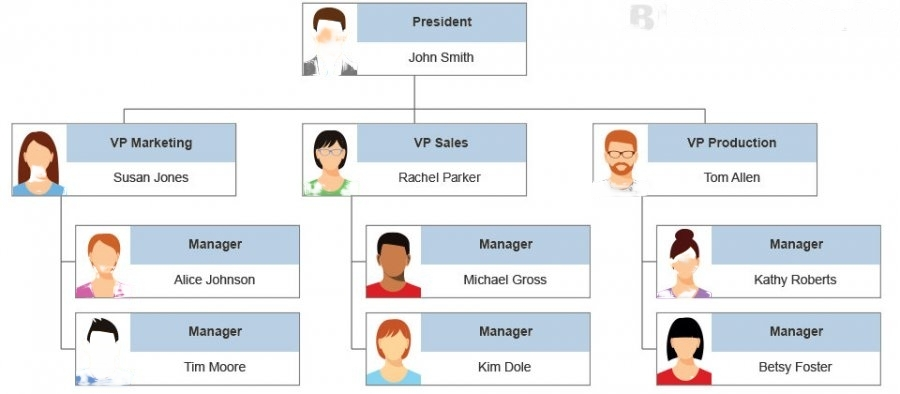

In [ ]:
Image(filename='/content/anthropic-cookbook/images/transcribe/org_chart.jpeg', width=500)

Turn this org chart into JSON indicating who reports to who. Only output the JSON and nothing else.

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image("/content/anthropic-cookbook/images/transcribe/org_chart.jpeg")}},
            {"type": "text", "text": "Turn this org chart into JSON indicating who reports to who. Only output the JSON and nothing else."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)

print(f"Using model:{MODEL_NAME}\n")
print(response.content[0].text)

Using model:claude-3-haiku-20240307

{
  "President": "John Smith",
  "VP Marketing": {
    "name": "Susan Jones",
    "reports_to": "President"
  },
  "VP Sales": {
    "name": "Rachel Parker",
    "reports_to": "President"
  },
  "VP Production": {
    "name": "Tom Allen",
    "reports_to": "President"
  },
  "Manager": [
    {
      "name": "Alice Johnson",
      "reports_to": "VP Marketing"
    },
    {
      "name": "Michael Gross",
      "reports_to": "VP Sales"
    },
    {
      "name": "Kathy Roberts",
      "reports_to": "VP Production"
    },
    {
      "name": "Tim Moore",
      "reports_to": "VP Marketing"
    },
    {
      "name": "Kim Dole",
      "reports_to": "VP Sales"
    },
    {
      "name": "Betsy Foster",
      "reports_to": "VP Production"
    }
  ]
}


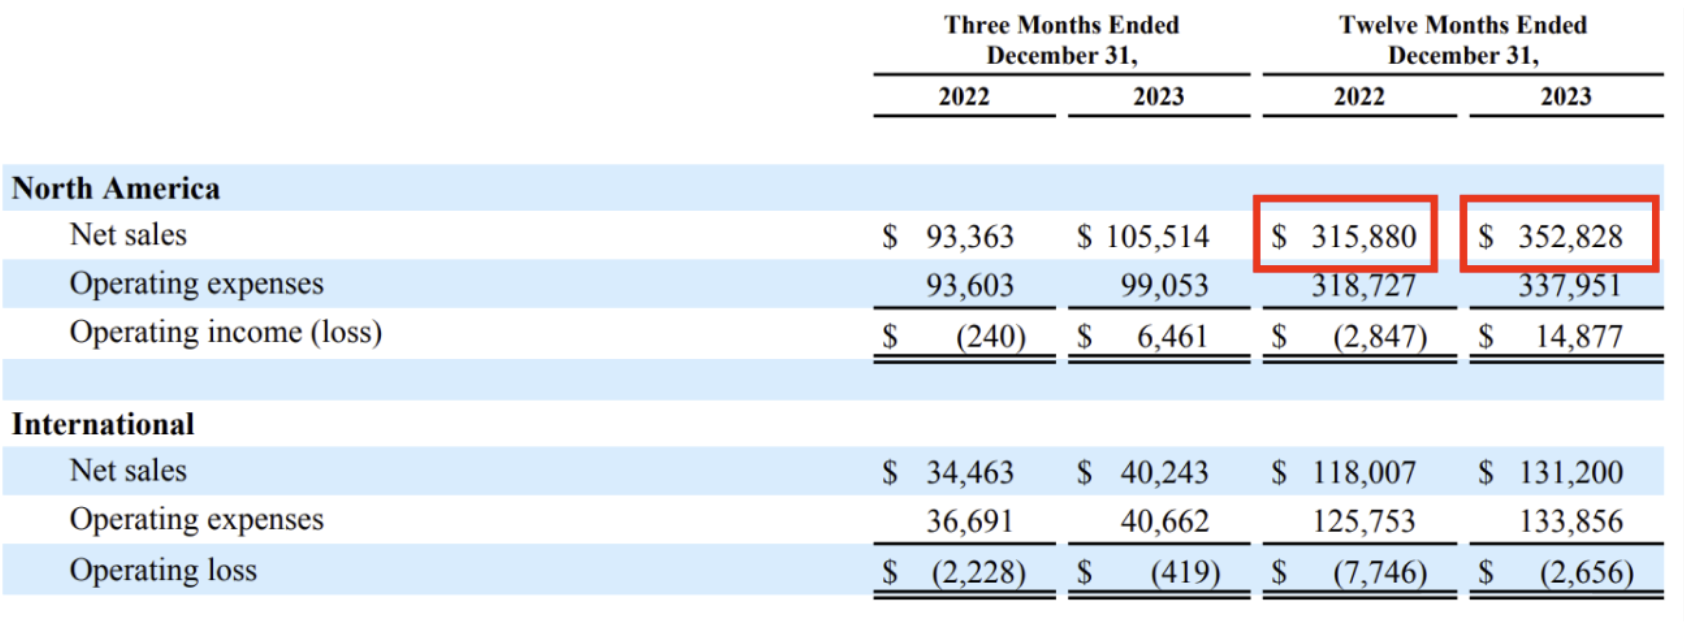

In [ ]:
Image(filename='/content/anthropic-cookbook/images/best_practices/table.png', width=500)

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("/content/anthropic-cookbook/images/best_practices/table.png")}},
            {"type": "text", "text": "Turn this P&L statement into JSON indicating the state of the company. Only output the JSON and nothing else."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)

print(f"Using model:{MODEL_NAME}\n")
print(response.content[0].text)

Using model:claude-3-haiku-20240307

{
  "northAmerica": {
    "netSales": {
      "3monthsEnded2022": 93363,
      "3monthsEnded2023": 105514,
      "12monthsEnded2022": 315880,
      "12monthsEnded2023": 352828
    },
    "operatingExpenses": {
      "3monthsEnded2022": 93603,
      "3monthsEnded2023": 99053,
      "12monthsEnded2022": 318727,
      "12monthsEnded2023": 337951
    },
    "operatingIncomeLoss": {
      "3monthsEnded2022": -240,
      "3monthsEnded2023": 6461,
      "12monthsEnded2022": -2847,
      "12monthsEnded2023": 14877
    }
  },
  "international": {
    "netSales": {
      "3monthsEnded2022": 34463,
      "3monthsEnded2023": 40243,
      "12monthsEnded2022": 118007,
      "12monthsEnded2023": 131200
    },
    "operatingExpenses": {
      "3monthsEnded2022": 36691,
      "3monthsEnded2023": 40662,
      "12monthsEnded2022": 125753,
      "12monthsEnded2023": 133856
    },
    "operatingLoss": {
      "3monthsEnded2022": -2228,
      "3monthsEnded2023": -419,
  

## LangChain

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_anthropic import ChatAnthropic

In [ ]:
# chat = ChatAnthropic(model='claude-3-opus-20240229')
# chat = ChatAnthropic(model='claude-3-sonnet-20240229')
chat = ChatAnthropic(model='claude-3-haiku-20240307')

In [ ]:
messages = [HumanMessage(content="knock knock")]
response = chat.invoke(messages)

display(Markdown(response.content))

Who's there?

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")

chain = prompt | chat

In [ ]:
response =  chain.invoke({"topic": "Space"})

display(Markdown(response.content))

Here's a space-themed joke for you:

Why don't scientists trust atoms?
Because they make up everything!